# Ken Anderson 

## Research question/interests

What airlines are the best and what are the worst at being on-time, cancelled, and customer satisfaction?
## Research questions:
- **Also through the other observations we find that american arlines even though they are the highest rated airline we find that they are the worst in most of out data, as they seem to be the best as being late, however due to the ammount of planes that american has flying per day is more than most of the other airlines that alos accounts for this. so a new research question is, within the mean/ average of the airlines what airline is the worst on basis of how many aircraft total they have, thus more airplanes they have the less one delay means as per a value. so if your fleet is smaller a delayed flight would be more substatial. thus is this statment true or does more airplanes within a fleet have a higher likely hood to fail due to the masses.**

- **also an interesting topic is the idea of basis of location are some areas more susetable to delays, persay in the winter is one region of the coast or state more sucetpable to a delay than that of a airport in arizona where the weather is great for the most part. compared to a state like wisconsin in the winter or idaho where the winter months will see more delays**

#### Follow up questions/observations

- so we find that 17 percent of security delays are held by spirit airlines. which is quite substantial when their numbers are 38737 delays per year on average. also a question I have that is out of scope is: does this account for late arrival also? or once it is classified as a security delay is it just that.?

- ["Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.]("https://aspm.faa.gov/aspmhelp/index/Types_of_Delay.html#:~:text=Security%20delay%20is%20caused%20by,29%20minutes%20at%20screening%20areas.so) this inforamtion is important for spirit with their security delays, I also read that overworking their workers and them being over their hours results in a security delay, this is quite substatial as we know spirit is a budget airline that boards with buses from the terminals as buying gates is expensive, so we can see the connection to the security delays with spirit as their boarding process isnt as seamless as it could be]

- although american airlines has a substantal fleet, is 140,000 late aircraft delays really acceptable for its fleet size, that is 11666.6666667 late aircraft per month, thats a lot of delays

- also its a shame this data doesnt show flowing flights like when a flight is delayed usually all of the rest of that airplanes flights for the day are delayed unless of some lucky tailwind that gets them back on time. this domino effect could be the cause of such high numbers with american airlines as american does usually shorter haul flights 2.5-6 hours usually from state to state cross country flights so the likelyhood that american sees more dominoe effect delays may be more likely as they do more smaller short haul flights in a day. 

- As for the airlines like Hawaian that tend to to either some short haul flights from island to island, for the most part they are doing some flights from the mainland to the islands thus these are really only 2 flights in 24hours as they go to mainland then back to the island, thus it makes sense that there are less delays and late aircarft delays due to the smaller amount of flights per day. 


### Following is the airline codes 
|#| Code | Airline |
|-----:|:------|:--------------|
|1|9E| Endeavor Air Inc.|
|2|AA| American Airlines Inc. |
|3|AS| Alaska Airlines Inc.|
|4|B6| JetBlue Airways|
|5|DL| Delta Air Lines Inc.|
|6|EV| ExpressJet Airlines Inc.|
|7|F9| Frontier Airlines Inc.|
|8|G4| Allegiant Air|
|9|HA| Hawaiian Airlines Inc.|
|10|MQ| Envoy Air|
|11|NK| Spirit Air Lines|
|12|OH| PSA Airlines Inc.|
|13|OO| SkyWest Airlines Inc.|
|14|QX| Horizon Air|
|15|UA| United Airlines Inc.|
|16|WN| Southwest Airlines Co.|
|17|YV|Mesa Airlines Inc.|
|18|YX|Republic Airline|

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
from code import ProjectFunctions1 as p1
#sample_data = pd.read_csv('airline.csv')
airlineDatajan2021Dec2021 = pd.read_csv('../data/raw/Airline_Data_Jan2021-Dec2021.csv')
#dfsummed = airlineDatajan2021Dec2021.groupby('carrier')['arr_flights','arr_del15'].sum()
#dfsummed
#we can changes this file above just ensure naming is somewhat descriptive cause this could get messy

ImportError: cannot import name 'ProjectFunctions1' from 'code' (C:\Users\maxti\miniconda3\lib\code.py)

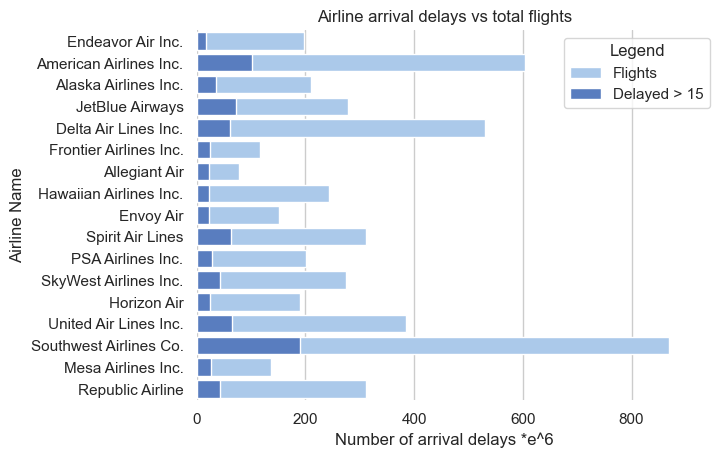

In [20]:
df1 = p1.processed_Without_Time("../data/raw/airline_data_filtered.csv")
sns.set_theme(style = "whitegrid")
sns.set_color_codes("pastel")
sns.barplot(data = df1, y = 'carrier_name',x = 'arr_flights', color = "b", errorbar=None).set(xlabel = "Number of arrival delays *e^6", title = "Airline arrival delays vs total flights",ylabel = "Airline Name")
sns.set_color_codes("muted")
sns.barplot(data = df1, y = 'carrier_name',x = 'arr_del15', color = "b",errorbar=None).set(xlabel = "Number of arrival delays *e^6",title = "Airline arrival delays vs total flights",ylabel = "Airline Name")
sns.despine(left= True, bottom = True)
labels = ['Flights', 'Delayed > 15']
plt.legend(labels, title = "Legend",bbox_to_anchor = (1.05,1), loc = "best")

In [3]:
data = pd.read_csv('../data/raw/Airline_Data_Jan2021-Dec2021.csv')
data.dropna(inplace = True)
df = data.drop(['year','month','carrier','carrier_name'],axis = 1)
df.to_csv('../data/raw/MapFile/mapfilefiltered.csv')

<AxesSubplot:title={'center':'Arrival Delays per Airport'}>

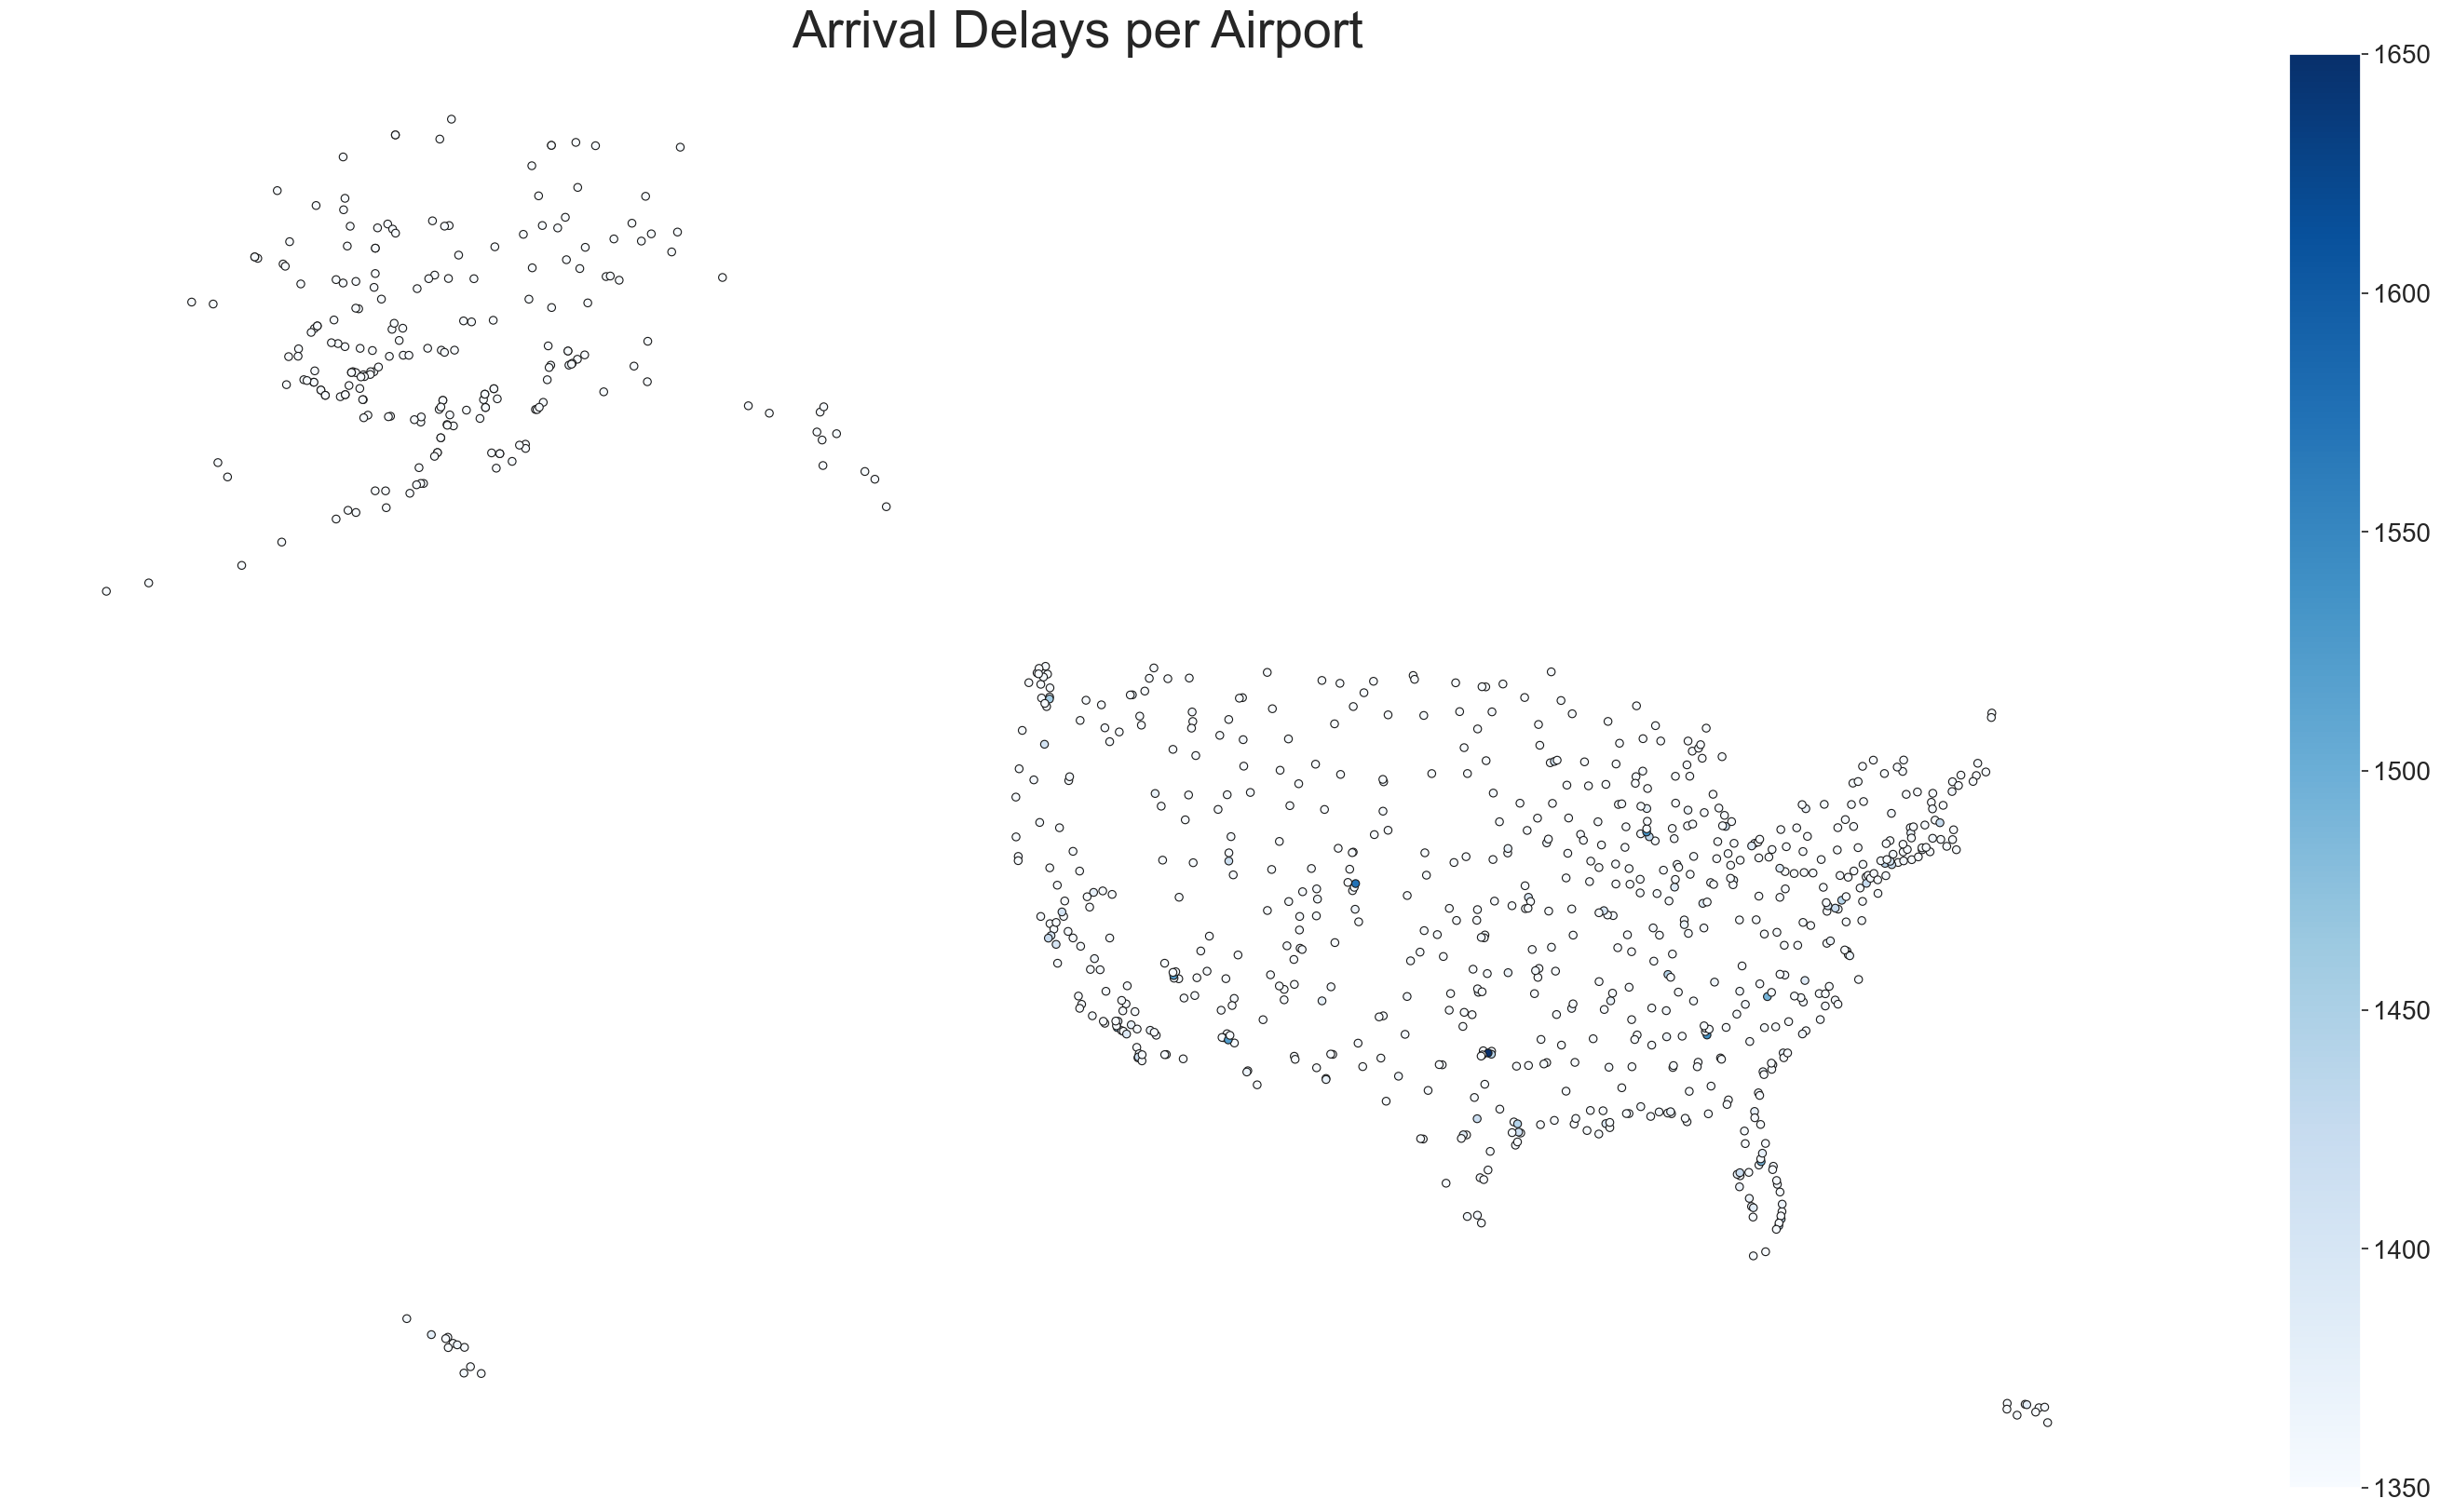

In [4]:
us_map = gpd.read_file('../data/raw/MapFile/airports.shp')
airlinedatafiltered = pd.read_csv('../data/raw/MapFile/mapfilefiltered.csv')
df = airlinedatafiltered.groupby('airport')['late_aircraft_ct'].sum().reset_index()
us_map = us_map.rename(columns = {'IATA':'airport'})
#merge data on common thing so airport code 
sns.set(style = "darkgrid")
merged = us_map.set_index('airport').join(df.set_index('airport'))
merged = merged.reset_index()
merged = merged.fillna(0)
fig,ax=plt.subplots(1,figsize=(40,20))
ax.axis('off')
ax.set_title('Arrival Delays per Airport',fontdict ={'fontsize': '40', 'fontweight': '3'})
color = 'Blues'
# plot bar size:
vmin,vmax = 0,1500
#dont touch these:
sm = plt.cm.ScalarMappable(cmap = color, norm = plt.Normalize(vmin=vmax, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
#end of dont touch braket
cbar.ax.tick_params(labelsize = 20)
merged.plot('late_aircraft_ct',cmap = color, linewidth=0.8, ax=ax, edgecolor = '0.1',figsize = (40,20))
#save figure option
#fig.savefig('KenMap_export.png',dpi = 300)

## getting rid of this chart.

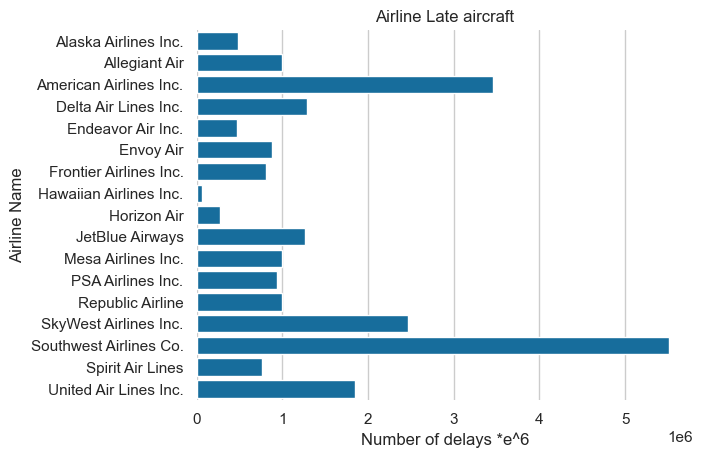

In [24]:
df2 = p1.processed_Without_Time("../data/raw/airline_data_filtered.csv")
df2 = df2.groupby('carrier_name')['late_aircraft_delay'].sum().reset_index()
sns.set_theme(style = "whitegrid")
sns.set_color_codes("colorblind")
#sns.barplot(data = airlineDatajan2021Dec2021, y = 'carrier_name',x = 'arr_flights', color = "b", errorbar=None).set(xlabel = "Number of arrival delays *e^6", title = "Airline arrival delays vs total flights",ylabel = "Airline Name")
#sns.set_color_codes("muted")
sns.barplot(data = df2, y = 'carrier_name',x = 'late_aircraft_delay', color = "b",errorbar=None).set(xlabel = "Number of delays *e^6",title = "Airline Late aircraft",ylabel = "Airline Name")
sns.despine(left= True, bottom = True)
labels = ['Flights', 'Late Aircraft delays']
#plt.legend(labels, title = "Legend",bbox_to_anchor = (1,1), loc = "best")

C:\Users\ander\AppData\Local\Temp\ipykernel_17364\36202417.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df3 = df3.groupby('carrier_name')['arr_flights','arr_diverted'].sum().reset_index()


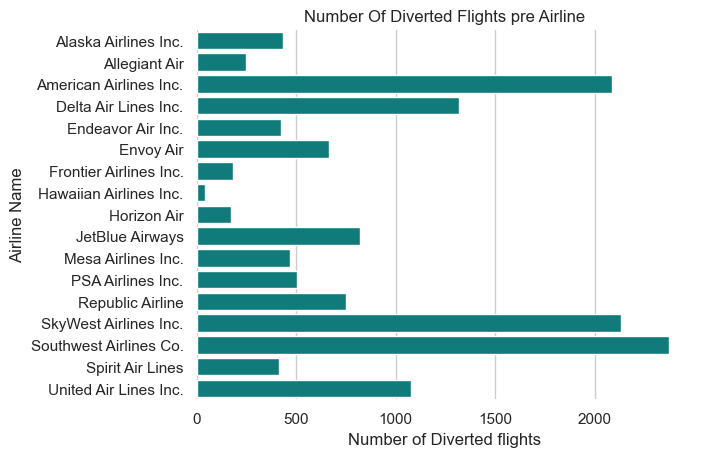

In [27]:
df3 = p1.processed_Without_Time("../data/raw/airline_data_filtered.csv")
df3 = df3.groupby('carrier_name')['arr_flights','arr_diverted'].sum().reset_index()
sns.set_theme(style = "whitegrid")
sns.barplot(data = df3, y = 'carrier_name',x = 'arr_diverted', color = "darkcyan",errorbar=None).set(xlabel = "Number of Diverted flights",title = "Number Of Diverted Flights pre Airline",ylabel = "Airline Name")
sns.despine(left= True, bottom = True)
labels = ['Flights', 'arr_diverted']
#plt.legend(labels, title = "Legend",bbox_to_anchor = (1,1), loc = "best")


C:\Users\ander\AppData\Local\Temp\ipykernel_17364\3316320821.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df4 = df4.groupby('carrier_name')['arr_flights','arr_cancelled'].sum().reset_index()


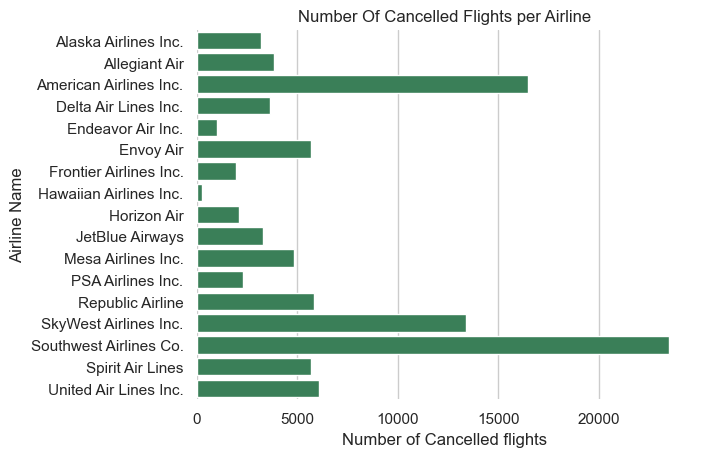

In [28]:
df4 = p1.processed_Without_Time("../data/raw/airline_data_filtered.csv")
df4 = df4.groupby('carrier_name')['arr_flights','arr_cancelled'].sum().reset_index()
sns.set_theme(style = "whitegrid")
#sns.set_color_codes("rocket")
sns.barplot(data = df4, y = 'carrier_name',x = 'arr_cancelled', color = "seagreen",errorbar=None).set(xlabel = "Number of Cancelled flights",title = "Number Of Cancelled Flights per Airline",ylabel = "Airline Name")
sns.despine(left= True, bottom = True)
labels = ['Flights', 'arr_canceled']

### So Far:
#### Southwest observation:
- Looks like Southwest takes the cake here on being the worst airline, for the most part they are lightyears ahead of the competition in being the worst. However fleet size does have some effect on these numerics as more airplanes the more possible delays you will have. 
#### American Airlines Observation:
- Seems like American Airlines is taking 2nd place in the worst airline on the list they are 2nd in most catergories: arrivals delayed more than 15 minutes, Late aircraft delays, and cancelled flights. However they are 3rd worst in Diverted flights

#### who is the best?
- Looks like Over the board Hawaiian Airlines is the best, due to their smaller to medium sized fleet compared to other airlines they seem to be the most on time and have the least sort of issues relating to delays and cancellation and delays

C:\Users\ander\AppData\Local\Temp\ipykernel_17364\1180550776.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df5 = df5.groupby('carrier_name')['arr_flights','arr_del15'].sum().reset_index()


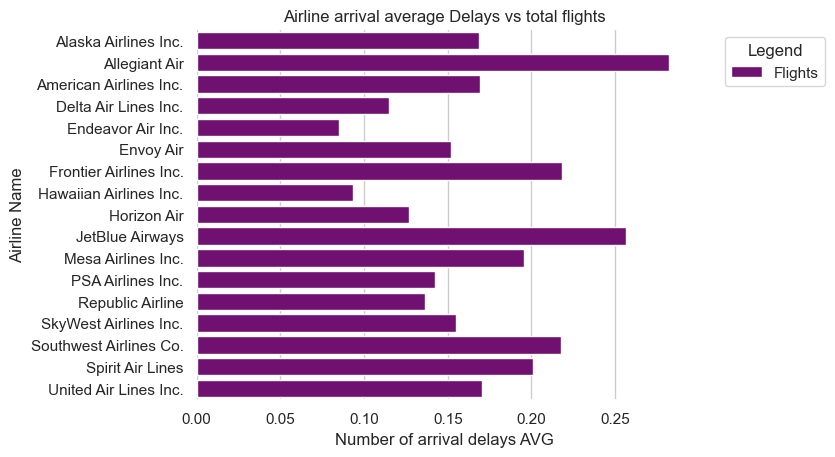

In [31]:
df5 = p1.processed_Without_Time("../data/raw/airline_data_filtered.csv")
df5 = df5.groupby('carrier_name')['arr_flights','arr_del15'].sum().reset_index()
df5["avg"] = df5["arr_del15"] / df5["arr_flights"]

sns.set_theme(style = "whitegrid")
sns.set_color_codes("pastel")
sns.barplot(data = df5, y = 'carrier_name',x = 'avg', color = "purple",errorbar=None).set(xlabel = "Number of arrival delays AVG",title = "Airline arrival average Delays vs total flights",ylabel = "Airline Name")
sns.despine(left= True, bottom = True)
labels = ['Flights', 'Delayed > 15']
plt.legend(labels, title = "Legend",bbox_to_anchor = (1.05,1), loc = "best")

### Wait a minute?
- So In actuallity based on the amount of flights the airline has compared to the delays looks like Allegiant, Jet Blue and Frontier place all in the 3 worst for arrival delays on average

- Looks like American, Southwest actually lay within the middle to high range of the pack, not too bad considering the amount of fligts, Lets look at that metric on its own:


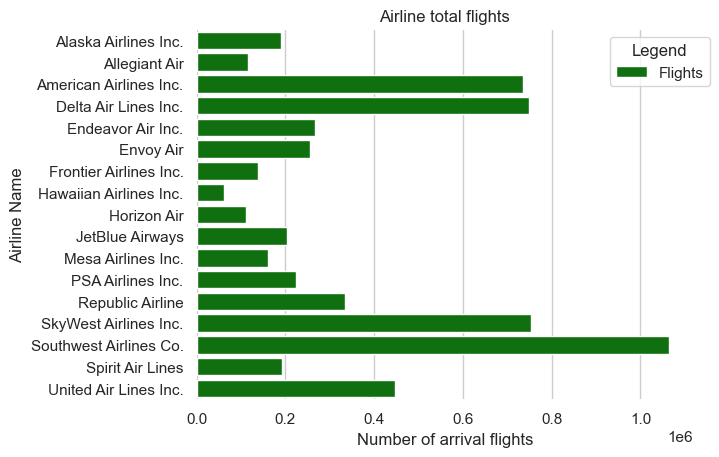

In [32]:
df6 = p1.processed_Without_Time("../data/raw/airline_data_filtered.csv")
df6 = df6.groupby('carrier_name')['arr_flights'].sum().reset_index()
sns.set_theme(style = "whitegrid")
sns.barplot(data = df6, y = 'carrier_name',x = 'arr_flights', color = "green",errorbar=None).set(xlabel = "Number of arrival flights",title = "Airline total flights",ylabel = "Airline Name")
sns.despine(left= True, bottom = True)
#labels = ['Flights', '']
plt.legend(labels, title = "Legend",bbox_to_anchor = (1.05,1), loc = "best")

C:\Users\ander\OneDrive\Desktop\Uni2023\DATA301\project-group-group51\analysis\ProjectFunctions1.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pd.read_csv(file)


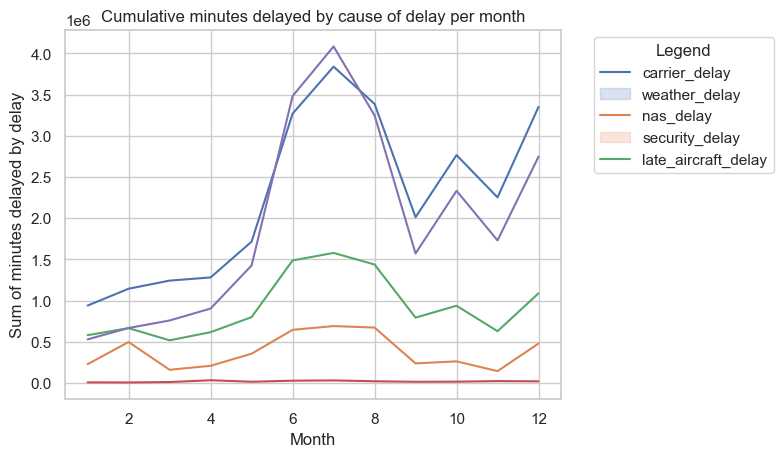

In [17]:
df6 = p1.grouped_Month("../data/raw/airline_data_filtered.csv")
sns.set_theme(style = "whitegrid")
sns.color_palette("muted")
sns.lineplot(data = df6, x = 'month', y = 'carrier_delay')
sns.lineplot(data = df6, x = 'month', y = 'weather_delay')
sns.lineplot(data = df6, x = 'month', y = 'nas_delay')
sns.lineplot(data = df6, x = 'month', y = 'security_delay')
sns.lineplot(data = df6, x = 'month', y = 'late_aircraft_delay').set(xlabel = "Month",title = "Cumulative minutes delayed by cause of delay per month",ylabel = "Sum of minutes delayed by delay")
labels = ['carrier_delay','weather_delay','nas_delay','security_delay', 'late_aircraft_delay']
plt.legend(labels, title = "Legend",bbox_to_anchor = (1.05,1), loc = "best")


## Milestone 3:


In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

#sample_data = pd.read_csv('airline.csv')
df = pd.read_csv('../data/raw/Airline_Data_Jan2021-Dec2021.csv')

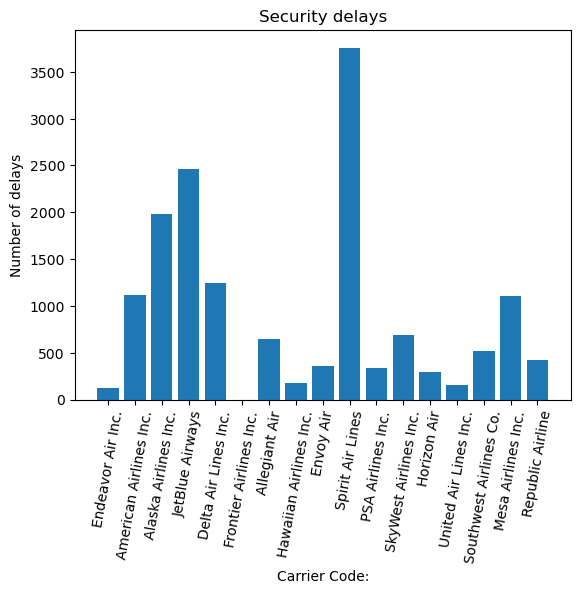

In [4]:
plt.bar(df.carrier_name, df.security_delay)
plt.title('Security delays')
plt.xlabel('Carrier Code:')
plt.ylabel('Number of delays')
plt.xticks(rotation = 80)
plt.show()

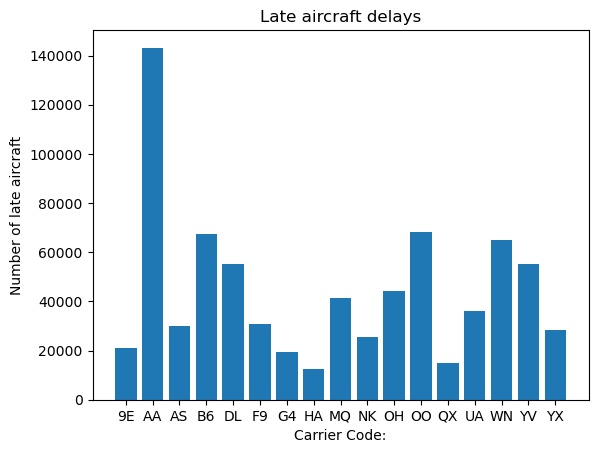

In [5]:
plt.bar(df.carrier, df.late_aircraft_delay)
plt.title('Late aircraft delays')
plt.xlabel('Carrier Code:')
plt.ylabel('Number of late aircraft')
plt.show()

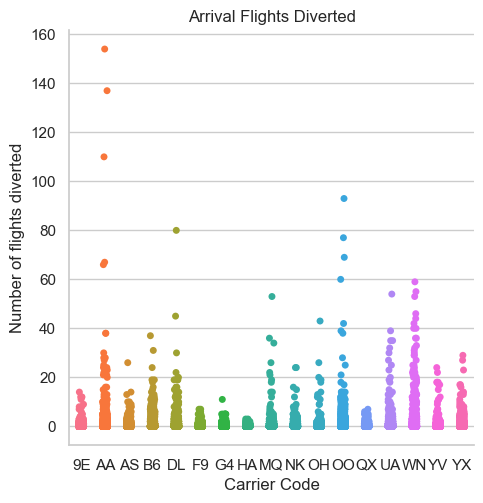

In [34]:
df = p1.processed_Without_Time("../data/raw/airline_data_filtered.csv")
plot = sns.catplot(df, y = 'arr_diverted', x = 'carrier', hue = "carrier").set(title = "Arrival Flights Diverted", xlabel = "Carrier Code", ylabel = "Number of flights diverted")
plot

In [ ]:

df2 = df.groupby('carrier')['security_delay'].sum() / df.groupby('carrier')['security_delay'].sum().sum()
df2